In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from glob import glob

import matplotlib
import matplotlib.font_manager as fm
import os
import re
import scipy.stats as sp
fpath = '/Library/Fonts/Myriad-Pro_31655.ttf'
prop = fm.FontProperties(fname=fpath)
fname = os.path.split(fpath)[1]
axis_font = {'fontname':fname, 'fontproperties':prop}

# Part 1: Load in data

In [6]:
in_dir = 'data/'
df = pd.read_csv(in_dir + '4b_tf_learning_metrics.csv')
df

,Unnamed: 0,r2,pearson,spearman,model
0,0,0.000187,-0.013677,-0.034602,onoff_original
1,1,0.727558,0.852970,0.687704,just_green
2,2,0.360637,0.600531,0.497995,tf_initialization
3,3,0.594703,0.771170,0.638629,tf_freeze_weights


In [7]:
# extract the r2 values to save to a clean csv
r2_df = df[['model', 'r2']]
r2_df
r2_df.to_csv('cleaned_csvs/4b_tf_learning_r2_values.csv')

In [8]:
# prep for plotting
models_df = pd.concat([df['model'], df['model']])
metrics_df = pd.concat([df['r2'], df['spearman']])
plot_df = pd.DataFrame()
plot_df['model'] = models_df
plot_df['metric'] = metrics_df
plot_df

,model,metric
0,onoff_original,0.000187
1,just_green,0.727558
2,tf_initialization,0.360637
3,tf_freeze_weights,0.594703
0,onoff_original,-0.034602
1,just_green,0.687704
2,tf_initialization,0.497995
3,tf_freeze_weights,0.638629


# Part 2: Make plots

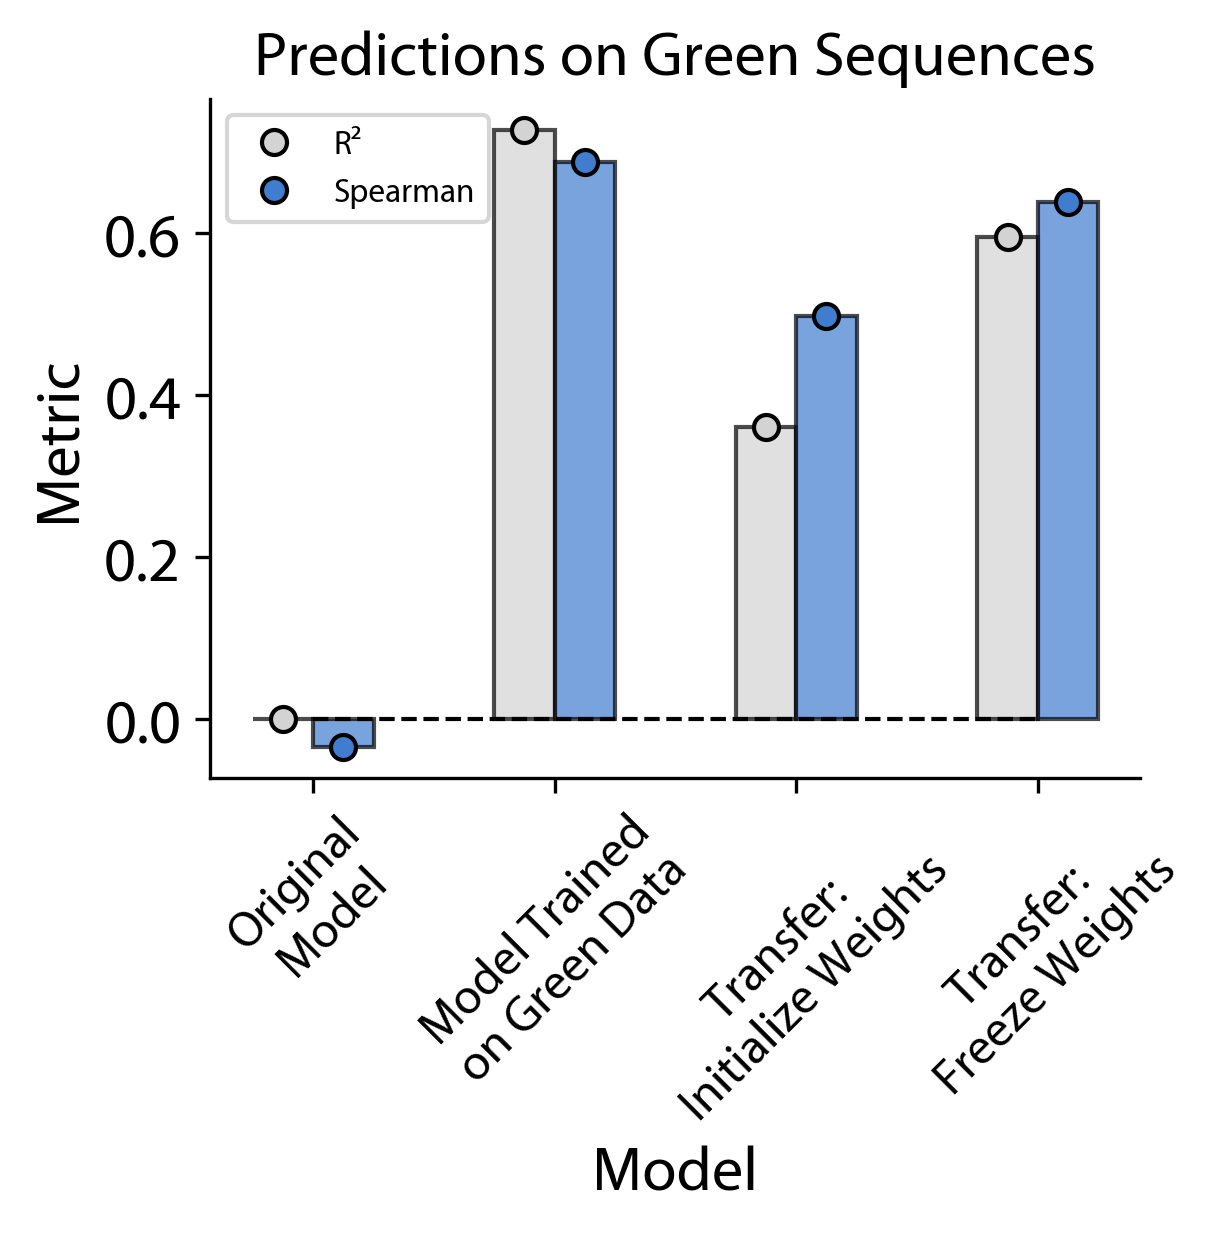

In [9]:
blue = '#407DCF'
grey = 'lightgray'

x = np.arange(len(df))  # the x locations for the groups
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize = (4,3), dpi = 300)


ax.bar(x - width/2, df['r2'], width,color = grey,edgecolor = 'black', alpha = 0.7)
ax.plot(x - width/2, df['r2'],marker = 'o', linestyle = '', color = grey, markeredgecolor = 'black',label='R\u00b2')

ax.bar(x + width/2, df['spearman'], width,color = blue,edgecolor = 'black', alpha = 0.7)
ax.plot(x + width/2, df['spearman'],marker = 'o', linestyle = '', color = blue, markeredgecolor = 'black',label='Spearman')

ax.plot(x, [0, 0, 0, 0], color='k', linestyle='--', linewidth=1)

legend_prop = fm.FontProperties(fname=fpath, size = 8)
plt.legend(loc = 'upper left', markerscale = 1, prop=legend_prop)

ax.set_yticklabels([np.round(x, 2) for x in ax.get_yticks()], **axis_font, fontsize = 15)
ax.set_ylabel('Metric', **axis_font, fontsize = 15)

ax.set_xticks(x)
ax.set_xticklabels(['Original\nModel', 'Model Trained\non Green Data', 'Transfer:\nInitialize Weights', 'Transfer:\nFreeze Weights'], rotation = 45, **axis_font, fontsize = 12)
ax.set_xlabel('Model', **axis_font, fontsize = 15)

ax.set_title('Predictions on Green Sequences', **axis_font, fontsize = 15)

ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#plt.savefig('../../illustrator_files/fig4/fig4_individuals/4b_transfer.svg')
plt.show()

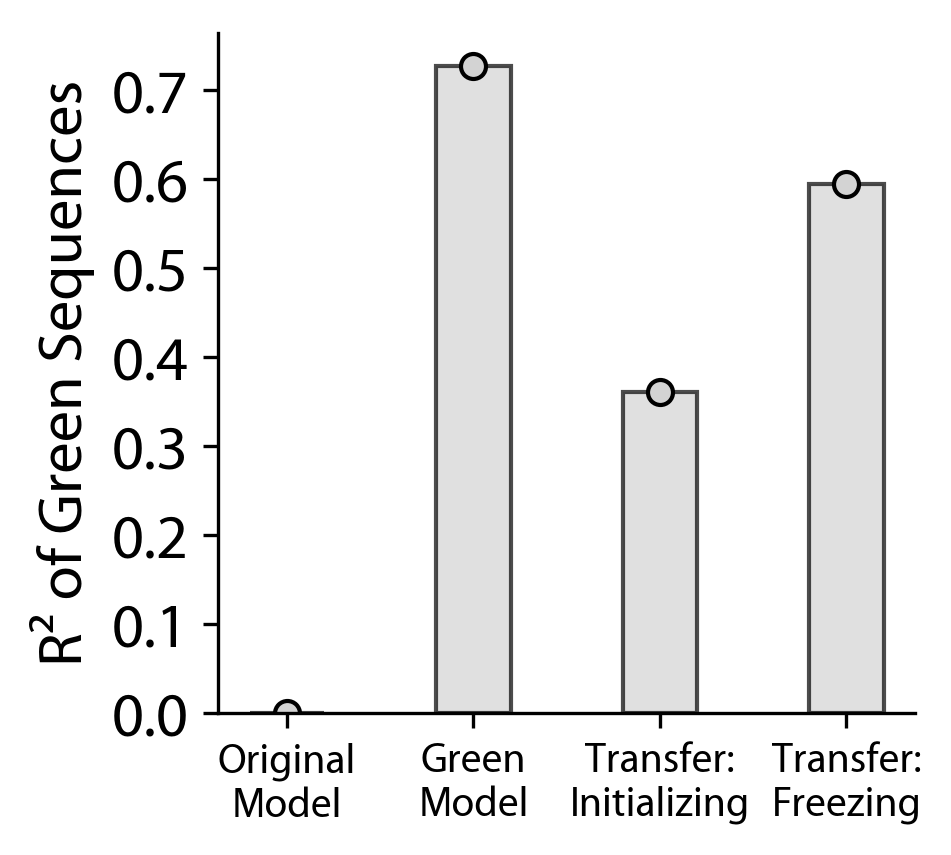

In [10]:
x = np.arange(len(df))  # the x locations for the groups
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize = (3,3), dpi = 300)

ax.bar(x, df['r2'], width,color = grey,edgecolor = 'black', alpha = 0.7)
ax.plot(x, df['r2'],marker = 'o', linestyle = '', color = grey, markeredgecolor = 'black')

ax.set_yticklabels([np.round(x, 2) for x in ax.get_yticks()], **axis_font, fontsize = 15)
ax.set_ylabel('R\u00b2 of Green Sequences', **axis_font, fontsize = 15)

ax.set_xticks(x)
ax.set_xticklabels(['Original\nModel', 'Green\nModel', 'Transfer:\nInitializing', 'Transfer:\nFreezing'], rotation = 0, **axis_font, fontsize = 10)

ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#plt.savefig('../../illustrator_files/fig4/fig4_individuals/4b_transfer.svg')
plt.show()